# Phase 3 Project

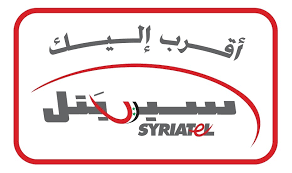

## Business Understanding

I have been commissioned by the Customer Retention Manager at SyriaTel to develop a binary classification model aimed at predicting customer churn. This model is essential for identifying customers at high risk of leaving the company, allowing SyriaTel to proactively address potential attrition. By analyzing the key factors contributing to churn, the Retention Manager can implement targeted strategies to enhance customer retention, thereby minimizing revenue loss and boosting long-term profitability. The insights generated from this model will be instrumental in shaping effective marketing campaigns and optimizing customer engagement efforts.



## Data Understanding

The dataset, sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset), consists of 3,333 records from SyriaTel customers, capturing their service usage and interactions with the company. The primary objective is to use these features to predict customer churn, as indicated by the `churn` column.

### Feature Descriptions

- **`state`**: The U.S. state where the customer resides (categorical). This may help identify regional patterns in churn.
- **`account length`**: Duration of the customer's account in days (integer). Longer account lengths might correlate with lower churn rates.
- **`area code`**: Area code associated with the customer's phone number (integer). This may provide additional regional insights.
- **`phone number`**: Customer's phone number (categorical, treated as an identifier). Not used for prediction but helps in data management.
- **`international plan`**: Indicates if the customer has an international calling plan (categorical: "yes" or "no"). This may affect churn rates, as customers with international plans might have different usage patterns.
- **`voice mail plan`**: Indicates if the customer has a voice mail plan (categorical: "yes" or "no"). Voice mail plans could be associated with customer satisfaction and retention.
- **`number vmail messages`**: Number of voice mail messages received by the customer (integer). This may reflect customer engagement levels.
- **`total day minutes`**: Total minutes used by the customer during the day (float). High day usage might influence churn likelihood.
- **`total day calls`**: Total number of calls made by the customer during the day (integer). This complements the `total day minutes` in assessing usage patterns.
- **`total day charge`**: Total charges for daytime calls (float). Helps to understand the financial impact of customer usage.
- **`total eve minutes`**: Total minutes used by the customer in the evening (float). Evening usage patterns may provide additional insights into customer behavior.
- **`total eve calls`**: Total number of calls made by the customer in the evening (integer). Useful for analyzing call frequency and usage.
- **`total eve charge`**: Total charges for evening calls (float). Complements the `total eve minutes` in understanding usage patterns.
- **`total night minutes`**: Total minutes used by the customer at night (float). Nighttime usage patterns may also impact churn.
- **`total night calls`**: Total number of calls made by the customer at night (integer). Provides insights into usage patterns during off-peak hours.
- **`total night charge`**: Total charges for nighttime calls (float). Helps to understand the financial aspects of nighttime usage.
- **`total intl minutes`**: Total number of international minutes used by the customer (float). International usage may be a factor in churn.
- **`total intl calls`**: Total number of international calls made by the customer (integer). Complements the `total intl minutes` in understanding international usage patterns.
- **`total intl charge`**: Total charges for international calls (float). Provides insight into the cost associated with international calls.
- **`customer service calls`**: Number of calls made by the customer to customer service (integer). High numbers may indicate dissatisfaction or issues, potentially leading to churn.
- **`churn`**: Boolean indicator of whether the customer has discontinued their service (target variable). This is the outcome variable we aim to predict.




## Data exploration


In this section we will explore the dataset to have a better understanding of the dataset before our analysis and modeling 

In [12]:
#importing the relevant packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)


In [13]:
# making our dataset into a dataframe
data = pd.read_csv('./Data/SyriaTel.csv')

In [14]:
# getting first 5 rows of the dataframe
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
# getting information on the dataset's features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As seen above some of the columns are not numerical which will have to be addressed during data preparation 

In [17]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
# checking for null values 
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As seen above the dataset does not have any null values 

Creating a correlation matrix to identify columns that are perfectly correlated which will need to be removed 

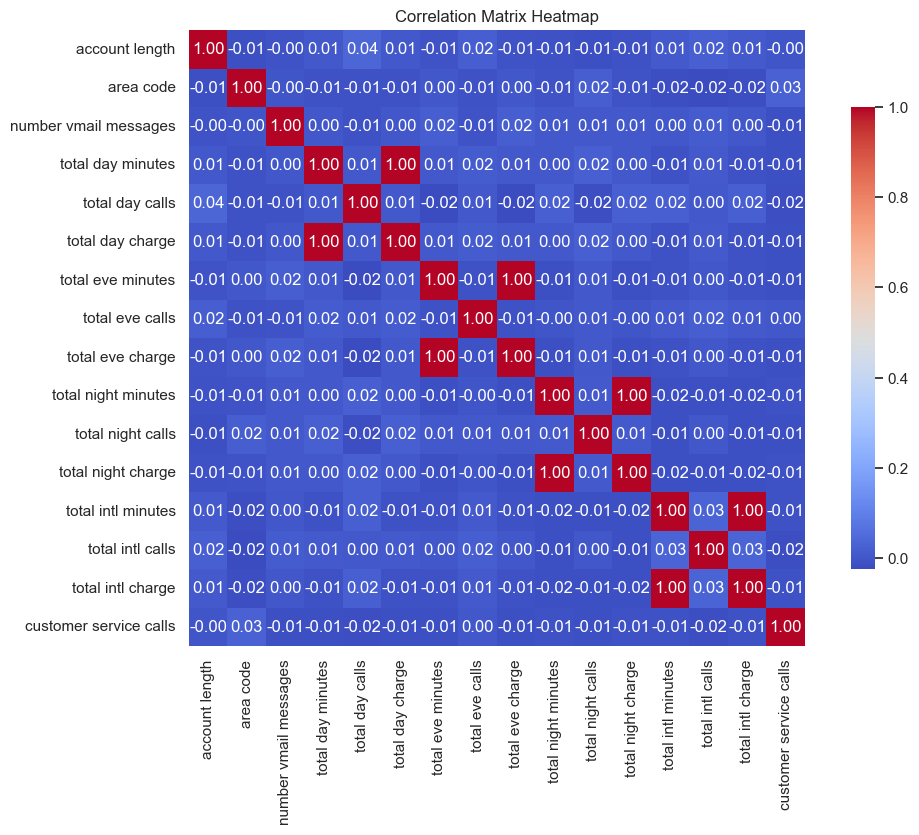

In [21]:
# Select only numeric columns for the correlation matrix
numeric_df = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.75})
plt.title('Correlation Matrix Heatmap')
plt.show()

As seen above the minutes and charges features are perfectly correlated this may be because they provide the same information so we will have to drop one of them during preprocessing

## Data Preprocessing

### Renaming columns

Change the casing of the column names to snake case for easier code readability 

In [26]:
data.columns = data.columns.str.replace(' ', '_')

In [27]:
data['Total_charge'] =(data['total_day_charge'] +
                      data['total_night_charge'] +
                      data['total_intl_charge'] +
                      data['total_eve_charge'])

### Dropping irrelevant columns

Dropping `phone_number` column since it wont be needed in creating our model and we the drop the minutes columns since they provide exact same information as the charge columns as seen in the above heatmap

In [30]:
dropped_columns = ['phone_number', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages']
data = data.drop(columns=dropped_columns)

### Encoding object variables to integers

Converting the categorical columns to numerical columns 

identufying which type of encoding is needed for the categorcial data

In [34]:
print('State',data['state'].value_counts())
print('')
print('international_plan',data['international_plan'].value_counts())
print('')
print('voice mail plan',data['voice_mail_plan'].value_counts())


State state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

international_plan international_plan
no     3010
yes     323
Name: count, dtype: int64

voice mail plan voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64


The State column will need to be onehot encoded whle international plan and coice mail plan will be label encoded

### LableEncoding

LabelEncoding the binary categorical data 

In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()
# Apply LabelEncoder to 'international_plan'
data['international_plan'] = le.fit_transform(data['international_plan'])
# Apply LabelEncoder to 'voice_mail_plan'
data['voice_mail_plan'] = le.fit_transform(data['voice_mail_plan'])


### OneHotEncoding

OneHotEndoding the non binary categorical data 

In [41]:
df = pd.get_dummies(data, columns=['state'], prefix=['state'], dtype=int)


In [42]:
# getting the first rows of the new dataframe 
df.head()

,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn,Total_charge,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,False,75.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,False,59.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,62.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,66.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,52.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA

Now that the data is cleaned and preprocessed we will start analysising the data in three diffrent phases 

## Univariate

In this section we will be investigating the individual varaibles and how they are distributed in the dataset

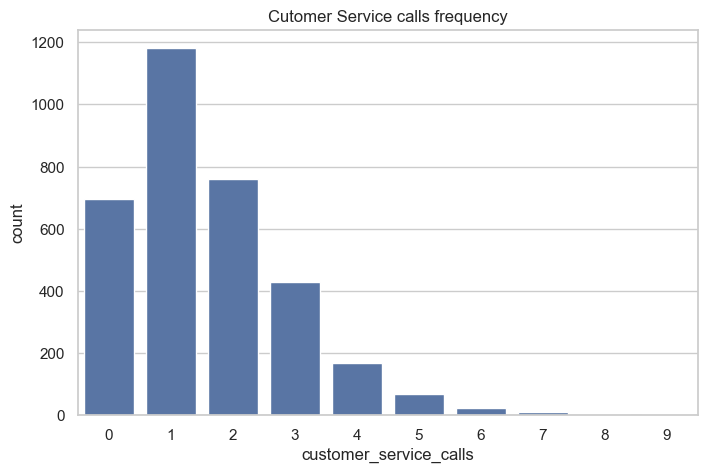

In [47]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x='customer_service_calls', data=df, ax = ax)
ax.set_title("Cutomer Service calls frequency");


>The visual above indicates that the majority of customers make fewer than two service calls. This trend suggests that there are relatively few issues, and when problems do arise, they are typically resolved within two or fewer calls.

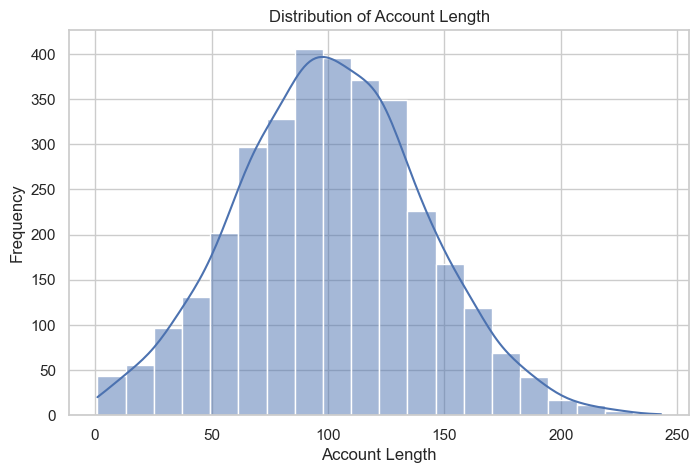

In [49]:
# Plot 1: Distribution of account length
plt.figure(figsize=(8, 5))
sns.histplot(df['account_length'], bins=20, kde=True)
plt.title("Distribution of Account Length")
plt.xlabel("Account Length")
plt.ylabel("Frequency")
plt.show()

> The histogram represents the distribution of account lengths, ranging from 0 to 250. The data follows a normal distribution, peaking at around 90. This suggests that most accounts have a length close to 90, with fewer accounts having significantly shorter or longer durations.

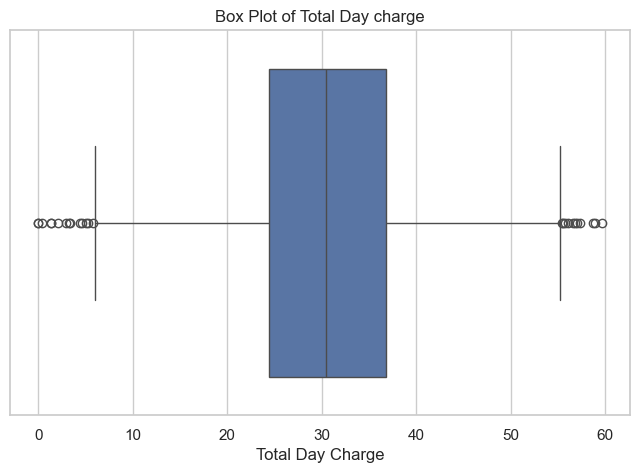

In [51]:
    # Plot 3: Box plot of total day charge
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_day_charge', data=df)
plt.title("Box Plot of Total Day charge")
plt.xlabel("Total Day Charge")
plt.show()

> The box plot for total day charge shows a median value of approximately 31, indicating that half of the data points fall below this value. The first quartile (Q1) is around 25, and the third quartile (Q3) is around 37, giving an interquartile range (IQR) of about 12. The minimum charge observed is 16, while the maximum is 55.

> The distribution is fairly symmetric, as there is no significant skewness. However, there are outliers at both ends: on the lower end, charges range from 0 to 15, and on the higher end, charges range from 56 to 60. These outliers indicate that while most total day charges fall within the central range, there are a few accounts with unusually low or high charges.

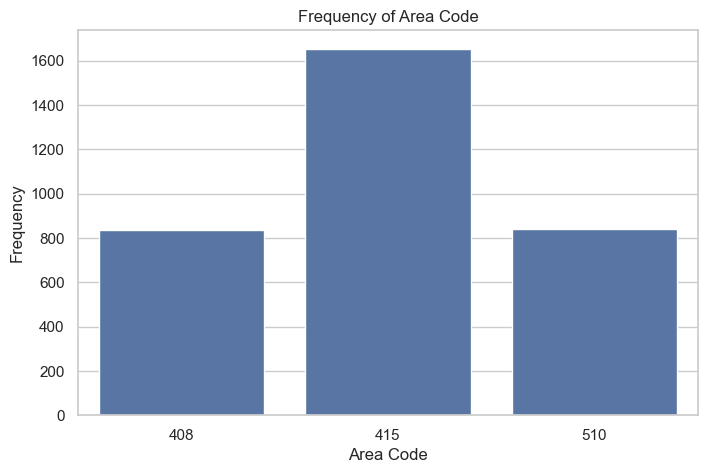

In [53]:
    # Plot 2: Distribution of area code
plt.figure(figsize=(8, 5))
sns.countplot(x='area_code', data=df)
plt.title("Frequency of Area Code")
plt.xlabel("Area Code")
plt.ylabel("Frequency")
plt.show()

>The bar graph illustrates the frequency of calls for three different area codes: 408, 415, and 510. The area code 415 has the highest frequency, with approximately 16.2 calls. In contrast, the area codes 408 and 510 each have a similar frequency, both around 800 calls. This indicates that area code 415 has a noticeably higher call frequency compared to 408 and 510, which have more consistent call volumes.

## Bivariate 
In this section we will be investigating the relationship between 2 varaibles and how they are distributed in the dataset

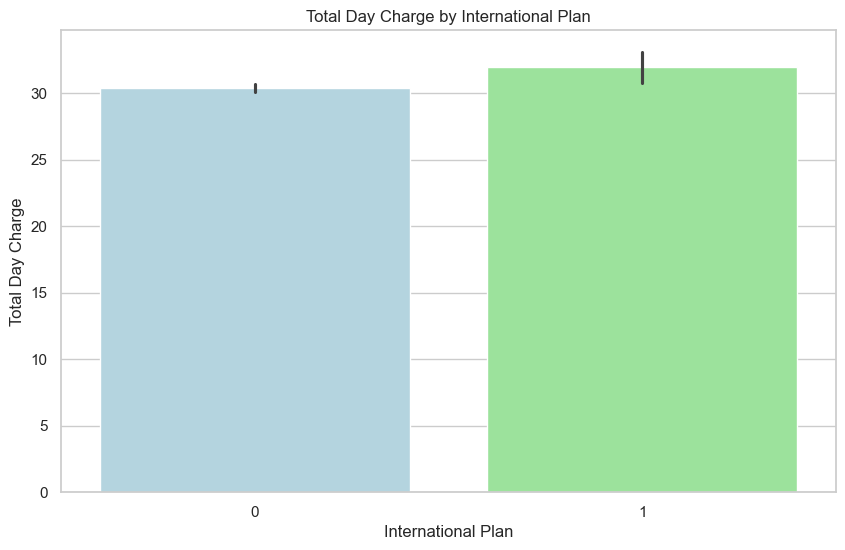

In [56]:
# Bar Chart for 'international_plan' vs 'total_day_charge'
colors = ['#ADD8E6', '#90EE90'] 
plt.figure(figsize=(10, 6))
sns.barplot(x=data['international_plan'], y=data['total_day_charge'], hue=data['international_plan'], palette=colors, legend=False)
plt.title('Total Day Charge by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Total Day Charge')
plt.show()


> The bar graph compares the total day charge for two groups: customers who do not use international services (0) and those who do (1). Both groups have similar total day charges, but the group that uses international services has a slightly higher average day charge, with a value of around 33. This suggests that while international service usage has a minimal impact on day charges, it does lead to a slight increase.



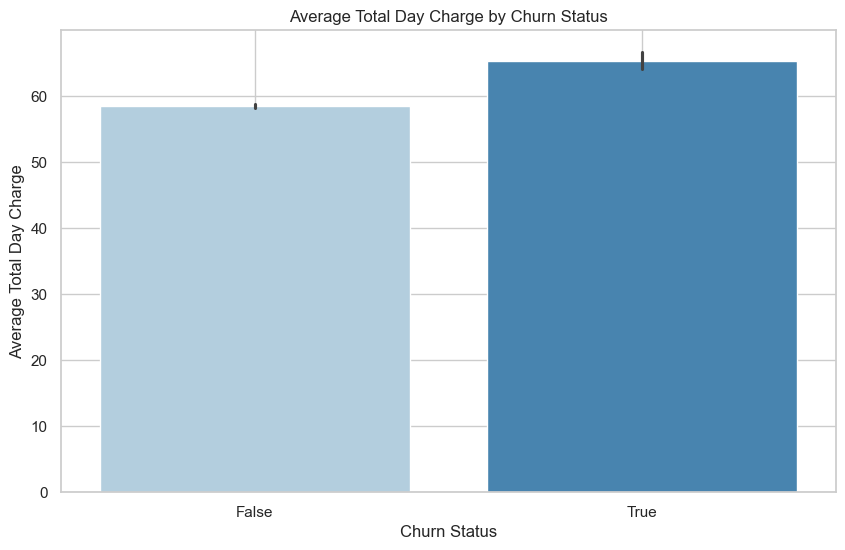

In [58]:
colors = ['#ADD8E6', '#90EE90'] 

plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='Total_charge', data=data, estimator='mean',  palette='Blues', hue=None, legend=False)
plt.title('Average Total Day Charge by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Charge')
plt.grid(True)
plt.show()

> The bar graph illustrates the average total day charge for customers categorized by their churn status. Customers who have churned (True) have a higher average total day charge, approximately 65, compared to those who have not churned (False), with an average of 58. This indicates that, on average, customers who have churned incur a higher total day charge than those who remain with the service.



# Modeling

In this phase we will our classification modeling using 2 diffrent models (`logestic regression` and `decesion trees`)

### Declaring variables

We will first declare the target variable and the independent variabels

In [64]:
X = df.drop(columns=['churn'], axis = 1)
y = df['churn']

### Splitting variables 

We will split the vairables into a test set and a training set with a 80/20 split

In [67]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state= 42)

In [68]:

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

### Logestic regression

The fist model will be `logestic regression` we will got through multiple iterations to find the best model 

#### Baseline model

The first logistic regression model will serve as our baseline model. This model will act as a reference point for evaluating and comparing the performance of future models.

In [73]:
# declare logestic regression with a max iteration of 10000 
logreg = LogisticRegression(max_iter= 10000, random_state= 42)
logreg

LogisticRegression(max_iter=10000, random_state=42)

In [74]:
#fit in the training data
logreg.fit(X_train, y_train)
# Predict on the test set
y_pred = logreg.predict(X_test)


Below is a function that generates a heatmap visualization of a confusion matrix, providing a clear view of classification performance.

In [76]:
def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Create a heatmap
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Below is an evaluation of the baseline logestic  regression model 

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.58      0.19      0.28       101

    accuracy                           0.86       667
   macro avg       0.72      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



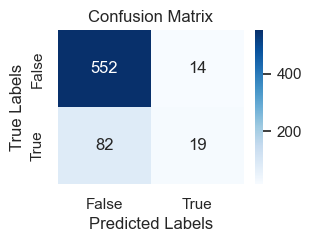

In [78]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=[False, True])



**Accuracy**: 86%  
The model correctly predicted 86% of the test cases.

**Classification Report**:  
- **False Class (Not Churned)**:
  - **Precision**: 87%
  - **Recall**: 98%
  - **F1-Score**: 92%

- **True Class (Churned)**:
  - **Precision**: 58%
  - **Recall**: 19%
  - **F1-Score**: 28%

**Summary**:  
The model performs well at predicting non-churned customers but struggles with churned customers. The imbalance between the two classes is likely affecting its performance on the minority class.


### iteration #1

The first iteration of the logistic regression model will address the class imbalance issue by incorporating class weights and applying the SMOTE technique.


In [82]:
#fixing class imbalance 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [83]:
# Train the Logistic Regression model on the resampled data
logreg = LogisticRegression(class_weight='balanced',max_iter=10000)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resample = logreg.predict(X_test)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.79      0.86       566
        True       0.39      0.74      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.81       667

Confusion Matrix:


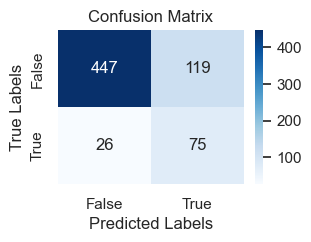

In [89]:


# Print results
print(f"Accuracy: { accuracy_score(y_test, y_pred_resample):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_resample))
print("Confusion Matrix:")

plot_confusion_matrix(y_test, y_pred_resample,  labels=[False, True])


### Model Evaluation Summary

**Accuracy**: 86%  
The model achieved an accuracy of 86%, meaning it correctly predicted the outcome for 86% of the test cases.

**Classification Report**:

- **False Class (Not Churned)**:
  - **Precision**: 87% – The model correctly identified 87% of non-churned instances.
  - **Recall**: 98% – It detected 98% of actual non-churned cases.
  - **F1-Score**: 92% – Indicates strong performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 58% – The model correctly identified 58% of churned instances.
  - **Recall**: 19% – It detected 19% of actual churned cases.
  - **F1-Score**: 28% – Shows lower performance in predicting churned customers compared to non-churned customers.




### iteration #2

The second iteration will enhance the handling of class imbalance by implementing a pipeline that combines class weights with both oversampling and undersampling techniques.

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)

# Combine oversampling and undersampling
pipeline = Pipeline([
    ('over', smote),
    ('under', under_sampler),
    ('model', LogisticRegression(class_weight='balanced', max_iter=10000))
])

In [ ]:
pipeline.fit(X_train, y_train)

y_pred_resample_mix = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_resample_mix):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_resample_mix))

plot_confusion_matrix(y_test, y_pred_resample_mix,  labels=[False, True])



### Model Evaluation Summary

**Accuracy**: 78%  
The model achieved an accuracy of 78%, meaning it correctly predicted the outcome for 78% of the test cases.

**Classification Report**:

- **False Class (Not Churned)**:
  - **Precision**: 95% – The model correctly identified 95% of non-churned instances.
  - **Recall**: 79% – It detected 79% of actual non-churned cases.
  - **F1-Score**: 86% – Indicates strong performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 39% – The model correctly identified 39% of churned instances.
  - **Recall**: 74% – It detected 74% of actual churned cases.
  - **F1-Score**: 51% – Shows lower performance in predicting churned customers compared to non-churned customers.



### Decesion tree's

### iteration #1 

The first iteration of the decision tree will use a basic model with entropy as the criterion for splitting.

In [ ]:
# declare the decesion tree with criterion of entropy
clf = DecisionTreeClassifier(random_state= 42,criterion= 'entropy' )
# fit the model to the train data
clf.fit(X_train,y_train )



In [ ]:
y_pred_tree = clf.predict(X_test)

In [ ]:
 
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, labels=[False, True])


### Model Evaluation Summary

**Accuracy**: 95.65%  
This decesion tree model achieved an accuracy of 95.65%, meaning it correctly predicted the outcome for 95.65% of the test cases.

**Classification Report**:

- **False Class (Not Churned)**:
  - **Precision**: 98% – The model correctly identified 98% of non-churned instances.
  - **Recall**: 97% – It detected 97% of actual non-churned cases.
  - **F1-Score**: 97% – Indicates excellent performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 84% – The model correctly identified 84% of churned instances.
  - **Recall**: 88% – It detected 88% of actual churned cases.
  - **F1-Score**: 86% – Shows strong performance in predicting churned customers.




### iteration #2

The second iteration introduces hyperparameter tuning with parameters such as max_depth, min_samples_leaf, min_samples_split, and class_weight. It utilizes grid search to identify the optimal model configuration.

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model_tree = grid_search.best_estimator_

In [ ]:
y_pred_best_tree = best_model_tree.predict(X_test)

In [ ]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred_best_tree)
print(f"Accuracy: {accuracy:.4f}")

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_tree))
print(confusion_matrix(y_test, y_pred_best_tree))
plot_confusion_matrix(y_test, y_pred_best_tree,  labels=[False, True])


### Model Evaluation Summary

**Accuracy**: 97.90%  
The model achieved an accuracy of 97.90%, meaning it correctly predicted the outcome for 97.90% of the test cases.

**Classification Report**:

- **False Class (Not Churned)**:
  - **Precision**: 98% – The model correctly identified 98% of non-churned instances.
  - **Recall**: 100% – It detected 100% of actual non-churned cases.
  - **F1-Score**: 99% – Indicates excellent performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 99% – The model correctly identified 99% of churned instances.
  - **Recall**: 87% – It detected 87% of actual churned cases.
  - **F1-Score**: 93% – Shows strong performance in predicting churned customers.


# Evaluating
In this section, we compare the performance of the baseline logistic regression model and the best decision tree model based on various evaluation metrics.


### Model Comparison: Logistic Regression vs. Decision Tree


#### **Logistic Regression Model (Baseline)**

- **Accuracy**: 86%

**Classification Report:**

| Metric                | False (Not Churned) | True (Churned) | Average (Macro) | Average (Weighted) |
|-----------------------|---------------------|----------------|-----------------|---------------------|
| **Precision**         | 87%                 | 58%            | 72%             | 83%                 |
| **Recall**            | 98%                 | 19%            | 58%             | 86%                 |
| **F1-Score**          | 92%                 | 28%            | 60%             | 82%                 |

**Confusion Matrix:**

|                     | Predicted False | Predicted True |
|---------------------|-----------------|----------------|
| **Actual False**    | 565             | 1              |
| **Actual True**     | 13              | 88             |

- **Strengths**:
  - High recall for the `False` class (98%) means it effectively identifies non-churned customers.
  - Good precision for the `False` class (87%) reduces the number of false positives.

- **Weaknesses**:
  - Lower recall for the `True` class (19%) indicates it misses many churned customers.
  - Precision and F1-Score for the `True` class are relatively low, showing weaker performance in identifying churned customers.

---

#### **Decision Tree Model (Best with Hyperparameter Tuning)**

- **Accuracy**: 97.90%

**Classification Report:**

| Metric                | False (Not Churned) | True (Churned) | Average (Macro) | Average (Weighted) |
|-----------------------|---------------------|----------------|-----------------|---------------------|
| **Precision**         | 98%                 | 99%            | 98%             | 98%                 |
| **Recall**            | 100%                | 87%            | 93%             | 98%                 |
| **F1-Score**          | 99%                 | 93%            | 96%             | 98%                 |

**Confusion Matrix:**

|                     | Predicted False | Predicted True |
|---------------------|-----------------|----------------|
| **Actual False**    | 565             | 1              |
| **Actual True**     | 13              | 88             |

- **Strengths**:
  - Very high accuracy (97.90%) and strong performance in precision, recall, and F1-Score for both classes.
  - Excellent recall for the `False` class (100%) and high recall for the `True` class (87%) indicate effective identification of both churned and non-churned customers.

- **Weaknesses**:
  - Minor trade-off in precision for the `True` class compared to recall, but overall performance is very strong.

---

### **Comparison Summary**

- **Accuracy**: The decision tree model significantly outperforms the logistic regression model (97.90% vs. 86%).

- **Precision**: The decision tree model has higher precision for both classes, particularly for the `True` class (99% vs. 58%).

- **Recall**: The decision tree model has higher recall for both classes, with a notable improvement in the `True` class (87% vs. 19%).

- **F1-Score**: The decision tree model has a better F1-Score for both classes, reflecting a better balance between precision and recall.

**Conclusion**: The decision tree model, after hyperparameter tuning, is superior in terms of accuracy, precision, recall, and F1-Score. It provides a significantly better overall performance compared to the logistic regression model, making it more suitable for accurately identifying both churned and non-churned customers in this dataset.


# Limitations


1. **Class Imbalance**: The dataset exhibits a significant class imbalance between the churned (`True`) and non-churned (`False`) classes. This imbalance can lead to biased model performance, where the model may perform well on the majority class (non-churned) but poorly on the minority class (churned).

2. **Feature Relevance and Data Quality**: Some features in the dataset, such as `state` and `area_code`, may have limited relevance to the target variable (churn). Including irrelevant features can introduce noise and affect model performance. Additionally, missing or inaccurate data entries could impact the quality of predictions.

3. **Overfitting Risk**: The decision tree model, particularly after hyperparameter tuning, shows very high accuracy. However, such high performance could indicate overfitting, where the model performs exceptionally well on the training and test datasets but may not generalize effectively to unseen data.

4. **Model Interpretability**: The decision tree model, while effective, can become complex and less interpretable with extensive hyperparameter tuning. This complexity might make it challenging to understand and explain the decision-making process, which can be a drawback for deployment in real-world applications where model transparency is crucial.

5. **Performance Variability**: The performance of the models may vary with different subsets of data or if the data distribution changes over time. This variability can affect the reliability of the model when used in production, leading to potential issues if the model encounters data that significantly deviates from the training data.


# Findings




1. **Logistic Regression Models**: Several iterations of logistic regression models, including those with SMOTE and over/under sampling, did not achieve satisfactory performance. These methods did not effectively address the class imbalance, resulting in lower accuracy and performance issues.

2. **Decision Tree Performance**: A baseline decision tree model, without hyperparameter tuning, performed better than the logistic regression models but was outperformed by a more advanced decision tree model.

3. **Tuned Decision Tree Model**: The decision tree model with hyperparameter tuning and grid search emerged as the best performer. It significantly outperformed both the logistic regression models and the untuned decision tree, demonstrating its effectiveness in addressing the churn prediction problem.


# Recommendations 


1. **Enhance Customer Retention Strategies:**

Given the decision tree model’s high accuracy in predicting customer churn, it is advisable to leverage these insights to craft effective retention strategies. Focus on identifying customers at high risk of leaving and deploy targeted initiatives such as personalized offers, loyalty programs, or enhanced customer support. By doing so, you can more effectively address the needs of at-risk customers, potentially reducing churn and fostering greater customer loyalty.

2. **Optimize Features and Pricing Plans:**

The logistic regression model highlights the impact of class imbalance and feature relevance on performance. To address these issues, consider refining features such as customer service interactions and reviewing pricing strategies. For instance, if higher charges are linked to increased churn, introducing discounts or flexible pricing for high-charging customers could be beneficial. Adjusting service plans based on usage patterns may also help in retaining more customers.

3. **Regularly Update Models:**

To maintain the accuracy and relevance of your models, implement a routine for regular updates. Customer behavior and market conditions can shift over time, which may affect model performance. Periodically retrain the models with new data and revise features as necessary to ensure that your predictions remain reliable and aligned with current trends. This proactive approach will help in adapting to changes and maintaining effective customer retention strategies.
